<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html day2.do.txt  -->
<!-- dom:TITLE: Quantum Fourier Transforms and the Quantum Phase Estimation algorithm -->

# Quantum Fourier Transforms and the Quantum Phase Estimation algorithm
**Nuclear Talent course**

Date: **May 22, 2024**

## Overarching motivation

We will start with discrete Fourier transforms (DFT).  There are many
motivations for the DFT. For those of you familiar with signal
processing, harmonic oscillations, and many other areas of
applications, Fourier transforms are almost standard kitchen
items. For those of you who have studied quantum theory, you have
probably met Fourier transforms when studying Heisenberg's uncertainty
relation between momentum and position.

## A familiar case

For problems with so-called harmonic oscillations, given by for example the following differential equation

$$
m\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=f(t),
$$

where $f(t)$ is an applied external force acting on the system (often
called a driving force), one can use the theory of Fourier
transformations to find the solutions of this type of equations.

## Several driving forces

If one has several driving forces, $f(t)=\sum_n f_n(t)$, one can find
the particular solution $x_{pn}(t)$ to the above differential equation for each $f_n$. The particular
solution for the entire driving force is then given by a series like

$$
x_p(t)=\sum_nx_{pn}(t).
$$

This is known as the principle of superposition. It only applies when
the homogenous equation is linear. 
Superposition is especially useful when $f(t)$ can be written
as a sum of sinusoidal terms, because the solutions for each
sinusoidal (sine or cosine)  term is analytic.

## Periodicity

Driving forces are often periodic, even when they are not
sinusoidal. Periodicity implies that for some time $t$ our function repeats itself periodically after a period $T$, that is

$$
f(t+\tau)=f(t).
$$

One example of a non-sinusoidal periodic force is a square wave. Many
components in electric circuits are non-linear, for example diodes. This 
makes many wave forms non-sinusoidal even when the circuits are being
driven by purely sinusoidal sources.

## Simple Code Example

The code here shows a typical example of such a square wave generated
using the functionality included in the **scipy** Python package. We
have used a period of $\tau=0.2$.

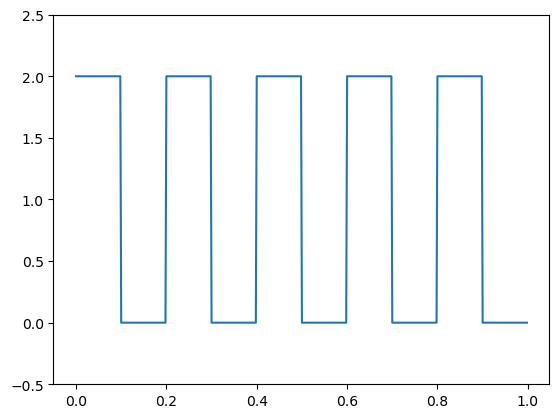

In [1]:
%matplotlib inline

import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t)
plt.plot(t, SqrSignal)
plt.ylim(-0.5, 2.5)
plt.show()

## Continuous Fourier transforms and the principle of Superposition

It was Fourier's idea to expand a continuous and periodic function $f(t)$ in terms of sums sinus and cosinus ordered functions (we will use exponentials however)
as

$$
f(t) = \sum_{k=1}^{n}a_k\sin{(2\pi kt+\phi_n)},
$$

with $\phi_n$ being a constant phase. The function $f$ is assumed to be bounded in order to be able to define properly the error in truncating the sum
over $n$, that is

$$
\int_a^b dt \vert f(t)\vert^2 \le M < \infty.
$$

Below we discuss how to find the coefficients $a_n$.

## Rewriting in terms of sines and cosines

It is common to rewrite the above sum in terms of sines and cosines and to add a complex constant $a_0$. This gives us

$$
f(t) = \frac{a_0}{2}+ \sum_{k=1}^{n}\left(a_k\cos{(2\pi kt)}+b_n\sin{(2\pi kt)}\right).
$$

Using the standard trigonometric relations

$$
\begin{align*}
\cos{t} = \frac{\exp{\imath t}+\exp{-\imath t}}{2} & \hspace{0.5cm} \sin{t} = \frac{\exp{\imath t}-\exp{-\imath t}}{2\imath}.
\end{align*}
$$

## Exponential expression

We can rewrite the Fourier expansion as

$$
f(t) =\sum_{k=-n}^{n}c_{k}\exp{(2\pi\imath kt)},
$$

with $c_0=a_0/2$. The coefficients $c_k$ are complex and satisfy $c_{-k}=c_k^*$.
The constant $c_{0}=c_0^*$ is a real number.

The above sum can also be rewritten in terms of the real part of the exponetials as

$$
f(t) =2\mathrm{Re}\left(\sum_{k=0}^{n}c_{k}\exp{(2\pi\imath kt} \right),
$$

where we used that $c_{-k}=c_k^*$. We leave it as an exercise to the reader to show the latter expression.

How do we determine the coefficients $c_k$?

## Determining $c_k$

Let us assume that we have a periodic function $f(t)$

$$
f(t) =\sum_{k=-n}^{n}c_{k}\exp{(2\pi\imath kt)},
$$

and we select the coefficient $c_l$, and multiply the l.h.s and r.h.s. with $\exp{(-2\pi\imath lt)}$, and isolate the $c_l$ terms

$$
c_l=f(t)\exp{(-2\pi\imath lt)}-\sum_{k=-n, k\ne l}^{n}c_{k}\exp{(2\pi\imath (k-l)t)}.
$$

## Integrating both sides

Then we integrate both sides (note we have assumed a period of one) from $0$ to $1$. This gives

$$
c_l=\int_0^1 dtf(t)\exp{(-2\pi\imath lt)},
$$

since the terms with the sum is zero.  We leave again this derivation as an exercise to the dedicated reader.
If the function $f$ is real ($t$ nd $dt$ are real), then $c_l^*=c_{-l}$.
The coefficients $c_n$ are normally called the Fourier coefficients and it is common to relabel them in terms of the function $f$ as

$$
\hat{f}(k)=\int_0^1 dt f(t)\exp{(-2\pi\imath kt)}.
$$

## Independence of interval length

In the discussions and equations above, we have assumed that the
integration interval has a length of one, that is a period of length one. It is easy to change this
length and as we show below, if we integrate from say $a$ to $a+1$, this is the same as integrating over an interval of length $1$.

To show this, we need also to recall that our function $f(t)$ is assumed to be periodic, that is we need to satisfy

$$
f(a+1)=f(a).
$$

Later we will generalize this to a period of arbitrary length.

Assume that $a$ is any number and taking the derivative of the integral with respect to $a$, we have

$$
\frac{d}{da}\left[\int_a^{a+1} dt f(t)\exp{(-2\pi\imath kt)}\right].
$$

## Writing out the various terms

From the last equation we have then

$$
\exp{(-2\pi\imath ka)}\exp{(-2\pi\imath k)}f(a+1)-\exp{(-2\pi\imath ka)}f(a)=0,
$$

where we used the periodicity  $f(a+1)=f(a)$ and that $\exp{(-2\pi\imath k)}=1$ since $k$ is an integer.
This shows that the expression for $\hat{f}$ is independent of $a$. A common instance is

$$
\hat{f}(k)=\int_{-\frac{1}{2}}^{\frac{1}{2}} dt f(t)\exp{(-2\pi\imath kt)}.
$$

## Changing period

What if the period is not equal to one? Assume we are working with a
function $f(t)$ whose period is $T$. We can then define a function
$g(t)$ with period one as

$$
g(t) = f(Tt),
$$

that is

$$
g(t) =\sum_{k=-n}^{n}c_{n}\exp{(2\pi\imath kt)},
$$

and introducing the variable $s=Tt$ we have $g(t)=f(s)$ we have

$$
f(s) = g(t)=\sum_{k=-n}^{n}c_{n}\exp{(2\pi\imath kt)}=\sum_{k=-n}^{n}c_{k}\exp{(2\pi\imath ks/T)}.
$$

## Harmonics

The so-called harmonics are now defined as $\exp{(2\pi\imath ks/T)}$.
We have

$$
\hat{g}(k)=\int_0^1 dt g(t)\exp{(-2\pi\imath kt)},
$$

and using $s=Tt$ we have

$$
\hat{g}(k)=\int_0^1 dt g(t)\exp{(-2\pi\imath kt)}=\frac{1}{T}\int_0^T ds f(s)\exp{(-2\pi\imath ks/T)}.
$$

For a period $T$ we have thus the general expression for the Fourier transform

$$
\hat{f}(k)=c_k=\frac{1}{T}\int_0^T dt f(t)\exp{(-2\pi\imath kt/T)}.
$$

## Typical interval

An often used choice of interval is

$$
\hat{f}(k)=c_k=\frac{1}{T}\int_{-T/2}^{T/2} dt f(t)\exp{(-2\pi\imath kt/T)},
$$

and a common choice for the harmonics is $(1/\sqrt{T})\exp{(2\pi\imath kt/T)}$.

As a small addendum, if the signal (function) $f(t)$ is real and even one has $f(-t)=f(t)$. If $f$ is an even function, then $\hat{f}$ is also an even function which leads to $\hat{f}(-k)=\hat{f}(k)$.

## Sinusoidal example
For the sinusoidal example the
period is $T=2\pi/\omega$. However, higher harmonics can also
satisfy the periodicity requirement. In general, any force that
satisfies the periodicity requirement can be expressed as a sum over
harmonics,

$$
f(t)=\frac{a_0}{2}+\sum_{n>0} a_n\cos(2n\pi t/T)+b_n\sin(2n\pi t/T).
$$

## Square well example

In the code discussed earlier, we used a square well as a our
example. If we assume our period has length $1$, we can define the
square well function $f(t)$ as

$$
f(t)=\left\{\begin{array}{cc} 1 & 0 \le t \le \frac{1}{2} \\
                              -1 & \frac{1}{2} < t \le 1\end{array}\right.
$$

The zeroth coefficient $a_0$ is zero since it is the average of the function $f(t)$ over the intergration domain $t\in [0,1]$.

## The coefficients

We find that the other coefficients are

$$
\hat{f}(n)=c_n=\int_0^1 dt f(t)\exp{(-2\pi\imath nt)}=\frac{1}{\imath\pi n}\left(1-\exp{-\imath\pi n}\right).
$$

We note that $(1-\exp{-\imath\pi n})$ is zero when $n$ is an even
number and $2$ when $n$ is an odd number. We can then combine the
positive and negative values of $n$ using

$$
\exp{(2\pi\imath nt)}-\exp{(-2\pi\imath nt)}=2\imath \sin{(2\pi nt)},
$$

and we have

$$
f(t)=\frac{4}{\pi}\sum_{k=0}^{\infty}\frac{1}{2k+1}\sin{(2\pi(2k+1)t)}.
$$

## Code for the  Fourier Transforms

The code here uses the Fourier series applied to a 
square wave signal. The code here
visualizes the various approximations given by Fourier series compared
with a square wave with period $T=0.2$ (dimensionless time), width $0.1$ and max value of the force $F=2$. We
see that when we increase the number of components in the Fourier
series, the Fourier series approximation gets closer and closer to the
square wave signal.

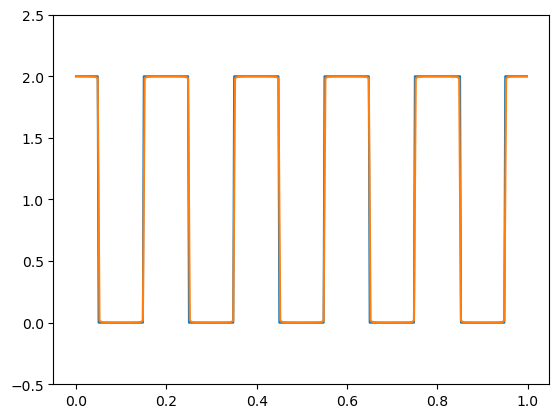

In [2]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
T =0.2
# Max value of square signal                                                                             
Fmax= 2.0
# Width of signal   
Width = 0.1
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
FourierSeriesSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t+np.pi*Width/T)
a0 = Fmax*Width/T
FourierSeriesSignal = a0
Factor = 2.0*Fmax/np.pi
for i in range(1,500):
    FourierSeriesSignal += Factor/(i)*np.sin(np.pi*i*Width/T)*np.cos(i*t*2*np.pi/T)
plt.plot(t, SqrSignal)
plt.plot(t, FourierSeriesSignal)
plt.ylim(-0.5, 2.5)
plt.show()

### Fourier transforms and convolution

We can use Fourier transforms in our studies of convolution as
well. To see this, assume we have two functions $f$ and $g$ and their
corresponding Fourier transforms $\hat{f}$ and $\hat{g}$. We remind
the reader that the Fourier transform reads (say for the function $f$)

$$
\hat{f}(y)=\boldsymbol{F}[f(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{-i\omega y} f(\omega),
$$

and similarly we have

$$
\hat{g}(y)=\boldsymbol{F}[g(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{-i\omega y} g(\omega).
$$

## Inverse Fourier transform

The inverse Fourier transform is given by

$$
\boldsymbol{F}^{-1}[g(y)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{i\omega y} g(\omega).
$$

The inverse Fourier transform of the product of the two functions $\hat{f}\hat{g}$ can be written as

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \exp{i\omega x} \hat{f}(\omega)\hat{g}(\omega).
$$

## Rewriting
We can rewrite the latter as

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\int_{-\infty}^{\infty} d\omega \exp{i\omega x} \hat{f}(\omega)\left[\frac{1}{2\pi}\int_{-\infty}^{\infty}g(y)dy \exp{-i\omega y}\right]=\frac{1}{2\pi}\int_{-\infty}^{\infty}dy g(y)\int_{-\infty}^{\infty} d\omega \hat{f}(\omega) \exp{i\omega(x- y)},
$$

which is simply

$$
\boldsymbol{F}^{-1}[(\hat{f}\hat{g})(x)]=\int_{-\infty}^{\infty}dy g(y)f(x-y)=(f*g)(x),
$$

the convolution of the functions $f$ and $g$.

## Transforming to discrete variables

In the Fourier transform $c_n$ is transformed from a dicrete variable
to a continuous one as $T \rightarrow \infty$. We then replace $c_n$ with
$f(k)dk$ and let $n/T \rightarrow k$, and the sum is changed to an
integral. This gives

$$
f(x) = \int_{-\infty}^{\infty}dkF(k) \exp{i(2\pi kx)}
$$

and

$$
F(k) = \int_{-\infty}^{\infty}dxf(x) \exp{-i(2\pi kx)}
$$

One way to interpret the Fourier transform is then as a transformation from one basis to another.

## Discrete Fourier transform

We change notation by replacing $t$ with $x$.

Next we make another generalization by having a discrete function,
that is $f(x) \rightarrow f(x_k)$ with $x_k = k\Delta x$ for $k=0,\dots, N-1$. This leads to the sums

$$
f_x = \frac{1}{n} \sum_{k=0}^{n-1}F_k \exp{i(2\pi kx)/n},
$$

and

$$
F_k = \sum_{x=0}^{n-1}f_x \exp{-i(2\pi kx)/n}.
$$

Although we have used functions here, this could also be a set of
numbers.

## Simple example

As an example we can have a set of complex numbers
$\{x_0,\dots,x_{n-1}\}$ with fixed length $n$, we can Fourier
transform this as

$$
y_k = \frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} x_j \exp{i(2\pi jk)/n},
$$

leading to a new set of complex numbers $\{ y_0,\dots,y_{n-1}\}$.

## Discrete Fourier Transformations

Consider two sets of complex numbers $x_k$ and $y_k$ with
$k=0,1,\dots,n-1$ entries. The discrete Fourier transform is defined
as

$$
y_k = \frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} \exp{(\frac{2\pi\imath jk}{n})} x_j.
$$

As an example, assume $x_0=1$ and $x_1=1$. We can then use the above expression to find $y_0$ and $y_1$.

With the above formula we get then

$$
\begin{align*}
y_0 &= \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 0\times 1}{2})}\times 2\right)\\
& =\frac{1}{\sqrt{2}}(1+2)=\frac{3}{\sqrt{2}},
\end{align*}
$$

and

$$
\begin{align*}
y_1 &= \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 1\times 1}{2})}\times 2\right)=\\
& =\frac{1}{\sqrt{2}}(1+2\exp{(\pi\imath)})=-\frac{1}{\sqrt{2}}.
\end{align*}
$$

## More details on Discrete Fourier transforms

Suppose that we have a vector $f$ of $n$ complex numbers, $f_{k}, k
\in\{0,1, \ldots, n-1\}$. Then the discrete Fourier transform (DFT) is
a map from these $n$ complex numbers to $n$ complex numbers, the
Fourier transformed coefficients $\tilde{f}_{j}$, given by

$$
\tilde{f}_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{-j k} f_{k}
$$

where $\omega=\exp \left(\frac{2 \pi i}{N}\right)$.

## Inverse DFT

The inverse DFT is given by

$$
f_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \tilde{f}_{k}
$$

To see this consider how the basis vectors transform. If $f_{k}^{l}=\delta_{k, l}$, then

$$
\tilde{f}_{j}^{l}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{-j k} \delta_{k, l}=\frac{1}{\sqrt{n}} \omega^{-j l}
$$

## Orthonormality

These DFT vectors are orthonormal, that is

$$
\sum_{j=0}^{n-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\frac{1}{n} \sum_{j=0}^{n-1} \omega^{j l} \omega^{-j m}=\frac{1}{N} \sum_{j=0}^{n-1} \omega^{j(l-m)}
$$

This last sum can be evaluated as a geometric series, but beware of the $(l-m)=0$ term, and yields

$$
\sum_{j=0}^{n-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\delta_{l, m}
$$

## Inverse transform

From this we can check that the inverse DFT does indeed perform the inverse transform:

$$
f_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \tilde{f}_{k}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \frac{1}{\sqrt{n}} \sum_{l=0}^{n-1} \omega^{-l k} f_{l}=\frac{1}{n} \sum_{k, l=0}^{n-1} \omega^{(j-l) k} f_{l}=\sum_{l=0}^{n-1} \delta_{j, l} f_{l}=f_{j}
$$

## Discrete Fourier transforms

The Discrete Fourier Transform is a tool used in many different fields
and finds applications in for example signal processing.  It has many
many applications (in Speech Recognition, Data Processing, Optics,
Acoustics). It is used in any application which performs Digital
Signal Processing.

There
is an efficient algorithm, called the Fast Fourier Transform (FFT),
which uses the special relationship amongst the roots of unity to
compute the entire DFT in $O(n \log{n})$ time. Moreover, it is possible to take the DFT and recover the original
polynomial in its coefficient form in $O(n \log{n})$ time, by using the
FFT to compute the inverse DFT.

## Fast Fourier transform (FFT)

Because of the many important applications of DFT, the Fast Fourier
Transform is ranked among the top ten  algorithms in the 20th century.
It came to light as a tool for Signal processing in 1965, when
Cooley (of IBM) and Tukey (of Princeton) wrote a paper presenting the
algorithm. However the basics of the algorithm were known long before
that, for example, it was known to Gauss back in 1805.
To read more about Fast Fourier transforms and similar topics, see for example [Fast Fourier Transform - Algorithms and Applications](https://link.springer.com/book/10.1007/978-1-4020-6629-0). See also <https://github.com/CompPhysics/QuantumComputingMachineLearning/blob/gh-pages/doc/Textbooks/fastfourier.pdf>

Our emphasis is on the link between discrete Fourier transforms and quantum Fourier transforms. We will not discuss FFT in this course.

## The discrete Fourier transform (DFT)

The discrete Fourier transform takes as input a complex vector

$$
\begin{align*}
\boldsymbol{x} =\vert\boldsymbol{x}\rangle= 
\begin{bmatrix}
x_0 \\ 
x_1 \\ 
x_2 \\
\vdots \\ 
x_{n-2} \\
x_{n-1}
\end{bmatrix}.
\end{align*}
$$

Each entry of the output vector $\vert \boldsymbol{y}\rangle$ is given by

$$
\begin{align*}
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_je^{2 \pi ijk/N}.
\end{align*}
$$

## Output vector

The output is a complex vector

$$
\begin{align*}
\vert \boldsymbol{y}\rangle = 
\frac{1}{\sqrt{n}}
\begin{bmatrix}
\sum_{j=0}^{n-1} x_je^{2\pi ij0/n} \\
\sum_{j=0}^{n-1} x_je^{2\pi ij1/n} \\
\sum_{j=0}^{n-1} x_je^{2\pi ij2/n} \\
\vdots \\
\sum_{j=0}^{n-1} x_je^{2\pi ij(n-2)/n} \\
\sum_{j=0}^{n-1} x_je^{2\pi ij(n-1)/n}
\end{bmatrix}
\end{align*}
$$

## Simple example

As an example we can have a set of complex numbers
$\{x_0,\dots,x_{n-1}\}$ with fixed length $n$, we can Fourier
transform this as

$$
y_k = \frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} x_j \exp{i(2\pi jk)/n},
$$

leading to a new set of complex numbers $\{ y_0,\dots,y_{n-1}\}$.

## Discrete Fourier Transformations

Consider two sets of complex numbers $x_k$ and $y_k$ with
$k=0,1,\dots,n-1$ entries. The discrete Fourier transform is defined
as

$$
y_k = \frac{1}{\sqrt{n}} \sum_{j=0}^{n-1} \exp{(\frac{2\pi\imath jk}{n})} x_j.
$$

As an example, assume $x_0=1$ and $x_1=1$. We can then use the above expression to find $y_0$ and $y_1$.

With the above formula we get then

$$
\begin{align*}
y_0 &= \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 0\times 1}{2})}\times 2\right)\\
& =\frac{1}{\sqrt{2}}(1+2)=\frac{3}{\sqrt{2}},
\end{align*}
$$

and

$$
\begin{align*}
y_1 &= \frac{1}{\sqrt{2}} \left( \exp{(\frac{2\pi\imath 0\times 1}{2})} \times 1+\exp{(\frac{2\pi\imath 1\times 1}{2})}\times 2\right)=\\
& =\frac{1}{\sqrt{2}}(1+2\exp{(\pi\imath)})=-\frac{1}{\sqrt{2}}.
\end{align*}
$$

## More details on Discrete Fourier transforms

Suppose that we have a vector $f$ of $n$ complex numbers, $f_{k}, k
\in\{0,1, \ldots, n-1\}$. Then the discrete Fourier transform (DFT) is
a map from these $n$ complex numbers to $n$ complex numbers, the
Fourier transformed coefficients $\tilde{f}_{j}$, given by

$$
\tilde{f}_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{-j k} f_{k}
$$

where $\omega=\exp \left(\frac{2 \pi i}{N}\right)$.

## Inverse DFT

The inverse DFT is given by

$$
f_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \tilde{f}_{k}
$$

To see this consider how the basis vectors transform. If $f_{k}^{l}=\delta_{k, l}$, then

$$
\tilde{f}_{j}^{l}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{-j k} \delta_{k, l}=\frac{1}{\sqrt{n}} \omega^{-j l}
$$

## Orthonormality

These DFT vectors are orthonormal, that is

$$
\sum_{j=0}^{n-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\frac{1}{n} \sum_{j=0}^{n-1} \omega^{j l} \omega^{-j m}=\frac{1}{N} \sum_{j=0}^{n-1} \omega^{j(l-m)}
$$

This last sum can be evaluated as a geometric series, but beware of the $(l-m)=0$ term, and yields

$$
\sum_{j=0}^{n-1} \tilde{f}^{l}{ }_{j}^{*} \tilde{f}_{j}^{m}=\delta_{l, m}
$$

## Inverse transform

From this we can check that the inverse DFT does indeed perform the inverse transform:

$$
f_{j}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \tilde{f}_{k}=\frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \omega^{j k} \frac{1}{\sqrt{n}} \sum_{l=0}^{n-1} \omega^{-l k} f_{l}=\frac{1}{n} \sum_{k, l=0}^{n-1} \omega^{(j-l) k} f_{l}=\sum_{l=0}^{n-1} \delta_{j, l} f_{l}=f_{j}
$$

## Fast Fourier transform and polynomial multiplication

The FFT algorithm is an $O(n\log{n})$ divide and conquer algorithm for DFT, used by
Gauss circa 1805, and popularized by Cooley and Turkey and 1965. Gauss used the
algorithm to determine periodic asteroid orbits, while Cooley and Turkey used it to
detect Soviet nuclear tests from oﬀshore readings.
A practical implementation of FFT is FFTW, which was described by Frigo and
Johnson at MIT. The algorithm is often implemented directly in hardware, for fixed $n$.

## From DFT to QFT

The Quantum Fourier Transform (QFT) has mathematically the same equation as starting point
but the notation is generally different. We generally compute the
quantum Fourier transform on a set of orthonormal basis state vectors
\(|0\rangle, |1\rangle, ..., |N-1\rangle\). The linear operator defining
the transform is given by the action on basis states

$$
|j\rangle \mapsto \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi ijk/N}|k\rangle.
$$

## In terms of arbitrary states

This can be written on arbitrary states,

$$
\sum_{j=0}^{N-1}x_j|j\rangle \mapsto \sum_{k=0}^{N-1} y_k|k\rangle
$$

where each amplitude \(y_k\) is the discrete Fourier transform of
\(x_j\).

## Unitarity

The quantum Fourier transform is unitary. Taking \(N = 2^n\),
for \(n\) qubits gives us the orthonormal (computational) basis

$$
|0\rangle, |1\rangle, ..., |2^{n}-1\rangle.
$$

## Binary representation

Each of the computational basis states can be represented in binary

$$
j = j_1j_2 \cdots j_n
$$

where each \(j_k\) is either \(0\) or \(1\), and the corresponding
binary vector is \(|j_1j_2 \cdots j_n\rangle\).

## Rewriting the QFT

The quantum Fourier
transform on one of these \(n\)-qubit vectors can be written as,

$$
\begin{align*}
|j_1j_2 \cdots j_n \rangle = \frac{\left(|0\rangle +e^{2\pi i0.j_n}|1\rangle\right) \otimes \left(|0\rangle +e^{2\pi i0.j_{n-1}j_n}|1\rangle\right) \otimes \cdots \otimes \left(|0\rangle +e^{2\pi i0.j_1j_2 \cdots j_n}|1\rangle\right)}{2^{n/2}}
\end{align*}
$$

## Short hand notation

In the above, we use the notation

$$
0.j_lj_{l+1} \cdots j_n = \frac{j+l}{2} + \frac{j_{l+1}}{2^2} + \cdots + \frac{j_n}{2^{m-l+1}}
$$

## Two-qubit system

First a two qubit system. See whiteboard notes.

## Four qubit system
Let us then move to  a four qubit system. The basis states are,

$$
|j_1j_2j_3j_4 \rangle
$$

where \(j_k\) is either \(0\) or \(1\). We have

$$
\begin{align*}
0.j_3 &= \frac{j_3}{2} \\
0.j_2j_3 &= \frac{j_2}{2} + \frac{j_3}{4} \\
0.j_1j_2j_3 &= \frac{j_1}{2} + \frac{j_2}{4} + \frac{j_3}{8} \\
0.j_0j_1j_2j_3 &= \frac{j_0}{2} + \frac{j_1}{4} + \frac{j_2}{8} + \frac{j_3}{16} \\
\end{align*}
$$

## QFT acts as follows

The quantum Fourier transform acts as follows:

$$
\begin{align*}
|j_1j_2j_3j_4 \rangle \mapsto \frac{1}{\sqrt{2^{4/2}}}
\left(|0\rangle + e^{2 \pi i 0.j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_2j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_1j_2j_3j4}|1\rangle \right) 
\end{align*}
$$

## Quantum circuits

To compose a quantum circuit that calculates the quantum Fourier
transform we use the operators

$$
\begin{align*}
R_k = 
\begin{bmatrix}
1 & 0 \\
0 & e^{2\pi i/2^k}
\end{bmatrix}.
\end{align*}
$$

For the circuit computing the QFT on four qubits, see whiteboard notes again.

## Rotation gates

In this example, the \(R_k\) gates are:

$$
\begin{align*}
R_1 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^0}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}, \quad 
R_2 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^2}
\end{bmatrix}, \quad 
R_3 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^3}
\end{bmatrix}, \quad 
R_4 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^4}
\end{bmatrix}.
\end{align*}
$$

## Quantum Fourier transform, more material

We have defined the QFT in terms of
the unitary operation

$$
\vert \psi'\rangle \leftarrow \hat{F}\vert \psi\rangle, \quad \hat{F}^\dagger \hat{F} = I
$$

## Orthonormal basis

In terms of an orthonormal basis $\vert 0 \rangle,\vert 1\rangle,\dots,\vert 0 \rangle$ this linear operator has the following action

$$
\vert j \rangle \rightarrow \sum_{k=0}^{N-1} \exp{i(2\pi jk/N)}\vert k
$$

or on an arbitrary state

$$
\sum_{j=0}^{N-1} x_j \vert j \rangle \rightarrow \sum_{k=0}^{N-1} y_k\vert k \rangle
$$

equivalent to the equation for discrete Fourier transform on a set of complex numbers.

## Using computational basis

Next we assume an $n$-qubit system, where we take $N=s^n$ in the computational basis

$$
\vert 0 \rangle,\dots,\vert 2^n -1\rangle.
$$

We make use of the binary representation $j = j_1 2^{n-1} + j_2
2^{n-2} + \dots + j_n 2^0$ , and take note of the notation $0.j_l
j_{l+1} \dots j_m$ representing the binary fraction $\frac{j_l}{2^1} +
\frac{j_{l+1}}{2^{2}} + \dots + \frac{j_m}{2^{m-l+1}}$. With this we
define the product representation of the quantum Fourier transform

$$
\vert j_1,\dots,j_n\rangle  \rightarrow 
\frac{
\left(\vert 0 \rangle + \exp{i(2\pi 0.j_n)}\right)
\left(\vert 0 \rangle + \exp{i(2\pi 0.j_{j-1}j_n)}\right)
\dots
\left(\vert 0 \rangle + \exp{i(2\pi 0.j_1j_2\dots j_n)}\right)
}{2^{n/2}}
$$

## Components

From the product representation we can derive a circuit for the
quantum Fourier transform. This will make use of the following two
single-qubit gates

$$
H = \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        1 & 1 \\
        1 & -1
    \end{bmatrix}
$$

$$
R_k =
    \begin{bmatrix}
        1 & 0 \\
        0 & e^{2\pi i/2^{k}}
    \end{bmatrix}
$$

## Using the Hadamard gate
The Hadamard
gate on a single qubit creates an equal superposition of its basis
states, assuming it is not already in a superposition, such that

$$
H\vert 0 \rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle + \vert 1\rangle\right), \quad H\vert 1\rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle - \vert 1\rangle\right)
$$

The $R_k$ gate simply adds a phase if the qubit it acts on is in the state $\vert 1\rangle$

$$
R_k\vert 0 \rangle = \vert 0 \rangle, \quad R_k\vert 1\rangle = e^{2\pi i/2^{k}}\vert 1\rangle
$$

Since all this gates are unitary, the quantum Fourier transfrom is also unitary.

## Algorithm

Assume we have a quantum register of $n$ qubits in the state $\vert j_1 j_2 \dots j_n\rangle$.
Applying the Hadamard gate to the first qubit
produces the state

$$
H\vert j_1 j_2 \dots j_n\rangle = \frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle.
$$

## Binary fraction

Here we have made use of the binary fraction to represent the action of the Hadamard gate

$$
\exp{2\pi i 0.j_1} = -1,
$$

if $j_1 = 1$ and $+1$ if $j_1 = 0$.

## Controlled rotation gate

Furthermore we can apply the controlled-$R_k$ gate, with all the other qubits $j_k$ for $k>1$ as control qubits to produce the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle
$$

Next we do the same procedure on qubit $2$ producing the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)}{2^{2/2}} \vert j_2 \dots j_n\rangle
$$

## Applying to all qubits

Doing this for all $n$ qubits yields state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)\dots \left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)}{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

At the end we use swap gates to reverse the order of the qubits

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_{n-1}j_n}\vert 1\rangle\right)\dots\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right) }{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

This is just the product representation from earlier, obviously our desired output.

## Quantum Fourier transform

Now lets turn to the Quantum Fourier transform (QFT). We've already
seen the QFT for $N=2$. It is the Hadamard transform:

$$
H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}
1 & 1  \\
1 & -1
\end{array}\right]
$$

## QFT for $N=2$

Why is this the QFT for $N=2$ ? Well suppose have the single qubit
state $a_{0}|0\rangle+a_{1}|1\rangle$. If we apply the Hadamard
operation to this state we obtain the new state

$$
\frac{1}{\sqrt{2}}\left(a_{0}+a_{1}\right)|0\rangle+\frac{1}{\sqrt{2}}\left(a_{0}-a_{1}\right)|1\rangle=\tilde{a}_{0}|0\rangle+\tilde{a}_{1}|1\rangle .
$$

In other words the Hadamard gate performs the DFT for $N=2$ on the
amplitudes of the state! Notice that this is very different that
computing the DFT for $N=2$ : remember the amplitudes are not numbers
which are accessible to us mere mortals, they just represent our
description of the quantum system.

## Full QFT

So what is the full quantum Fourier transform? It is the transform
which takes the amplitudes of a $N$ dimensional state and computes the
Fourier transform on these amplitudes (which are then the new
amplitudes in the computational basis.) In other words, the QFT enacts
the transform

$$
\sum_{x=0}^{N-1} a_{x}|x\rangle \rightarrow \sum_{x=0}^{N-1} \tilde{a}_{x}|x\rangle=\sum_{x=0}^{N-1} \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_{N}^{-x y} a_{y}|x\rangle
$$

## Explicit transform
It is easy to see that this implies that the QFT performs the following transform on basis states:

$$
|x\rangle \rightarrow \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \omega_{N}^{-x y}|y\rangle
$$

Thus the QFT is given by the matrix

$$
U_{Q F T}=\frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_{N}^{-y x}|y\rangle\langle x|
$$

## Unitarity
The last  matrix is unitary. Let's check this:

$$
\begin{align*}
U_{Q F T} U_{Q F T}^{\dagger} & =\frac{1}{N} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_{N}^{y x}|x\rangle\left\langle y\left|\sum_{x^{\prime}=0}^{N-1} \sum_{y^{\prime}=0}^{N-1} \omega_{N}^{-y^{\prime} x^{\prime}}\right| y^{\prime}\right\rangle\left\langle x^{\prime}\right| \\
& =\frac{1}{N} \sum_{x, y, x^{\prime}, y^{\prime}=0}^{N-1} \omega_{N}^{y x-y^{\prime} x^{\prime}} \delta_{y, y^{\prime}}|x\rangle\left\langle x^{\prime}\left|=\frac{1}{N} \sum_{x, y, x^{\prime}=0}^{N-1} \omega_{N}^{y\left(x-x^{\prime}\right)}\right| x\right\rangle\left\langle x^{\prime}\right| \\
& =\sum_{x, x^{\prime}=0}^{N-1} \delta_{x, x^{\prime}}|x\rangle\left\langle x^{\prime}\right|=I 
\end{align*}
$$

## Importance of QFT

The QFT is a very important transform in quantum computing. It can be
used for all sorts of cool tasks, including, as we shall see in Shor's
algorithm. But before we can use it for quantum computing tasks, we
should try to see if we can efficiently implement the QFT with a
quantum circuit. Indeed we can and the reason we can is intimately
related to the fast Fourier transform.

## Circuit QFT

Let's derive a circuit for the QFT when $N=2^{n}$. The QFT performs the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \sum_{y=0}^{2^{n}-1} \omega_{N}^{-x y}|y\rangle
$$

Then we can expand out this sum

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \sum_{y_{1}, y_{2}, \ldots, y_{n} \in\{0,1\}} \omega_{N}^{-x \sum_{k=1}^{n} 2^{n-k} y_{k}}\left|y_{1}, y_{2}, \ldots, y_{n}\right\rangle
$$

## Expanding the exponential

Expanding the exponential of a sum to a product of exponentials and
collecting these terms in from the appropriate terms we can express
this as

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \sum_{y_{1}, y_{2}, \ldots, y_{n} \in\{0,1\}} \bigotimes_{k=1}^{n} \omega_{N}^{-x 2^{n-k} y_{k}}\left|y_{k}\right\rangle
$$

## Rearranging

We can rearrange the sum and products as

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \bigotimes_{k=1}^{n}\left[\sum_{y_{k} \in\{0,1\}} \omega_{N}^{-x 2^{n-k} y_{k}}\left|y_{k}\right\rangle\right]
$$

Expanding this sum yields

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}} \bigotimes_{k=1}^{n}\left[|0\rangle+\omega_{N}^{-x 2^{n-k}}|1\rangle\right]
$$

## Notation for binary fraction

But now notice that $\omega_{N}^{-x 2^{n-k}}$ is not dependent on the
higer order bits of $x$. It is convenient to adopt the following
expression for a binary fraction:

$$
0 . x_{l} x_{l+1} \ldots x_{n}=\frac{x_{l}}{2}+\frac{x_{l+1}}{4}+\cdots+\frac{x_{n}}{2^{n-l+1}}
$$

## More notations
Then we can see that

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}}\left[|0\rangle+e^{-2 \pi i 0 . x_{n}}|1\rangle\right] \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{n-1} x_{n}}|1\rangle\right] \otimes \cdots \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \cdots x_{n}}|1\rangle\right]
$$

This is a very useful form of the QFT for $N=2^{n}$. Why? Because we
see that only the last qubit depends on the the values of all the
other input qubits and each further bit depends less and less on the
input qubits. Further we note that $e^{-2 \pi i 0 . a}$ is either +1
or -1 , which reminds us of the Hadamard transform.

## Deriving a circuit

So how do we use this to derive a circuit for the QFT over $N=2^{n}$ ?

Take the first qubit of $\left|x_{1}, \ldots, x_{n}\right\rangle$ and
apply a Hadamard transform. This produces the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2}}\left[|0\rangle+e^{-2 \pi i 0 \cdot x_{1}}|1\rangle\right] \otimes\left|x_{2}, x_{3}, \ldots, x_{n}\right\rangle
$$

## Rotation gate
Now define the rotation gate

$$
R_{k}=\left[\begin{array}{cc}
1 & 0  \tag{30}\\
0 & \exp \left(\frac{-2 \pi i}{2^{k}}\right)
\end{array}\right]
$$

If we now apply controlled $R_{2}, R_{3}$, etc. gates controlled on
the appropriate bits this enacts the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2}}\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \ldots x_{n}}|1\rangle\right] \otimes\left|x_{2}, x_{3}, \ldots, x_{n}\right\rangle
$$

## Proceeding

Thus we have reproduced the last term in the QFTed state. Of course
now we can proceed to the second qubit, perform a Hadamard, and the
appropriate controlled $R_{k}$ gates and get the second to last
qubit. Thus when we are finished we will have the transform

$$
|x\rangle \rightarrow \frac{1}{\sqrt{2^{n}}}\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \cdots x_{n}}|1\rangle\right] \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{1} x_{2} \cdots x_{n-1}}|1\rangle\right] \otimes \cdots \otimes\left[|0\rangle+e^{-2 \pi i 0 . x_{n}}|1\rangle\right]
$$

Reversing the order of these qubits will then produce the QFT!

<!-- The circuit we have constructed on $n$ qubits is -->

<!-- \includegraphics[max width=\textwidth]{2024_03_18_c1d427fa6b85efa365f1g-5} -->

## QFT

The Quantum Fourier Transform (QFT) has mathematically the same equation as starting point
but the notation is generally different. We generally compute the
quantum Fourier transform on a set of orthonormal basis state vectors
\(|0\rangle, |1\rangle, ..., |N-1\rangle\). The linear operator defining
the transform is given by the action on basis states

$$
|j\rangle \mapsto \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi ijk/N}|k\rangle.
$$

## In terms of arbitrary states

This can be written on arbitrary states,

$$
\sum_{j=0}^{N-1}x_j|j\rangle \mapsto \sum_{k=0}^{N-1} y_k|k\rangle
$$

where each amplitude \(y_k\) is the discrete Fourier transform of
\(x_j\).

## Unitarity

The quantum Fourier transform is unitary. Taking \(N = 2^n\),
for \(n\) qubits gives us the orthonormal (computational) basis

$$
|0\rangle, |1\rangle, ..., |2^{n}-1\rangle.
$$

## Binary representation

Each of the computational basis states can be represented in binary

$$
j = j_1j_2 \cdots j_n
$$

where each \(j_k\) is either \(0\) or \(1\), and the corresponding
binary vector is \(|j_1j_2 \cdots j_n\rangle\).

## Rewriting the QFT

The quantum Fourier
transform on one of these \(n\)-qubit vectors can be written as,

$$
\begin{align*}
|j_1j_2 \cdots j_n \rangle = \frac{\left(|0\rangle +e^{2\pi i0.j_n}|1\rangle\right) \otimes \left(|0\rangle +e^{2\pi i0.j_{n-1}j_n}|1\rangle\right) \otimes \cdots \otimes \left(|0\rangle +e^{2\pi i0.j_1j_2 \cdots j_n}|1\rangle\right)}{2^{n/2}}
\end{align*}
$$

## Short hand notation

In the above, we use the notation

$$
0.j_lj_{l+1} \cdots j_n = \frac{j_l}{2} + \frac{j_{l+1}}{2^2} + \cdots + \frac{j_n}{2^{n-l+1}}
$$

If we start counting from zero, that is we have instead

$$
\begin{align*}
|j_0j_1 \cdots j_{n-1} \rangle = \frac{\left(|0\rangle +e^{2\pi i0.j_{n-1}}|1\rangle\right) \otimes \left(|0\rangle +e^{2\pi i0.j_{n-2}j_n}|1\rangle\right) \otimes \cdots \otimes \left(|0\rangle +e^{2\pi i0.j_0j_1 \cdots j_{n-1}}|1\rangle\right)}{2^{n/2}},
\end{align*}
$$

we get

$$
0.j_lj_{l+1} \cdots j_{n-1} = \frac{j_l}{2} + \frac{j_{l+1}}{2^2} + \cdots + \frac{j_{n-1}}{2^{n-l}}
$$

## Four qubit system
The basis states are

$$
|j_1j_2j_3j_4 \rangle
$$

where \(j_k\) is either \(0\) or \(1\). We have

$$
\begin{align*}
0.j_3 &= \frac{j_3}{2} \\
0.j_2j_3 &= \frac{j_2}{2} + \frac{j_3}{4} \\
0.j_1j_2j_3 &= \frac{j_1}{2} + \frac{j_2}{4} + \frac{j_3}{8} \\
0.j_0j_1j_2j_3 &= \frac{j_0}{2} + \frac{j_1}{4} + \frac{j_2}{8} + \frac{j_3}{16} \\
\end{align*}
$$

## QFT acts as follows

The quantum Fourier transform acts as follows:

$$
\begin{align*}
|j_1j_2j_3j_4 \rangle \mapsto \frac{1}{\sqrt{2^{4/2}}}
\left(|0\rangle + e^{2 \pi i 0.j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_2j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_1j_2j_3j4}|1\rangle \right) 
\end{align*}
$$

## Quantum circuits

To compose a quantum circuit that calculates the quantum Fourier
transform we use the operators

$$
\begin{align*}
R_k = 
\begin{bmatrix}
1 & 0 \\
0 & e^{2\pi i/2^k}
\end{bmatrix}.
\end{align*}
$$

## Rotation gates

In this example, the \(R_k\) gates are:

$$
\begin{align*}
R_1 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^0}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}, \quad 
R_2 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^2}
\end{bmatrix}, \quad 
R_3 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^3}
\end{bmatrix}, \quad 
R_4 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^4}
\end{bmatrix}.
\end{align*}
$$

## Using the Hadamard gate
The Hadamard
gate on a single qubit creates an equal superposition of its basis
states, assuming it is not already in a superposition, such that

$$
H\vert 0 \rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle + \vert 1\rangle\right), \quad H\vert 1\rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle - \vert 1\rangle\right)
$$

The $R_k$ gate simply adds a phase if the qubit it acts on is in the state $\vert 1\rangle$

$$
R_k\vert 0 \rangle = \vert 0 \rangle, \quad R_k\vert 1\rangle = e^{2\pi i/2^{k}}\vert 1\rangle
$$

Since all this gates are unitary, the quantum Fourier transfrom is also unitary.

## Algorithm

Assume we have a quantum register of $n$ qubits in the state $\vert j_1 j_2 \dots j_n\rangle$.
Applying the Hadamard gate to the first qubit
produces the state

$$
H\vert j_1 j_2 \dots j_n\rangle = \frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle.
$$

## Binary fraction

Here we have made use of the binary fraction to represent the action of the Hadamard gate

$$
\exp{2\pi i 0.j_1} = -1,
$$

if $j_1 = 1$ and $+1$ if $j_1 = 0$.

## Controlled rotation gate

Furthermore we can apply the controlled-$R_k$ gate, with all the other qubits $j_k$ for $k>1$ as control qubits to produce the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle
$$

Next we do the same procedure on qubit $2$ producing the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)}{2^{2/2}} \vert j_2 \dots j_n\rangle
$$

## Applying to all qubits

Doing this for all $n$ qubits yields state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)\dots \left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)}{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

At the end we use swap gates to reverse the order of the qubits

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_{n-1}j_n}\vert 1\rangle\right)\dots\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right) }{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

This is just the product representation from earlier, obviously our desired output.

## QFT

The Quantum Fourier Transform (QFT) has mathematically the same equation as starting point
but the notation is generally different. We generally compute the
quantum Fourier transform on a set of orthonormal basis state vectors
\(|0\rangle, |1\rangle, ..., |N-1\rangle\). The linear operator defining
the transform is given by the action on basis states

$$
|j\rangle \mapsto \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi ijk/N}|k\rangle.
$$

## In terms of arbitrary states

This can be written on arbitrary states,

$$
\sum_{j=0}^{N-1}x_j|j\rangle \mapsto \sum_{k=0}^{N-1} y_k|k\rangle
$$

where each amplitude \(y_k\) is the discrete Fourier transform of
\(x_j\).

## Unitarity

The quantum Fourier transform is unitary. Taking \(N = 2^n\),
for \(n\) qubits gives us the orthonormal (computational) basis

$$
|0\rangle, |1\rangle, ..., |2^{n}-1\rangle.
$$

## Binary representation

Each of the computational basis states can be represented in binary

$$
j = j_1j_2 \cdots j_n
$$

where each \(j_k\) is either \(0\) or \(1\), and the corresponding
binary vector is \(|j_1j_2 \cdots j_n\rangle\).

## Rewriting the QFT

The quantum Fourier
transform on one of these \(n\)-qubit vectors can be written as,

$$
\begin{align*}
|j_1j_2 \cdots j_n \rangle = \frac{\left(|0\rangle +e^{2\pi i0.j_n}|1\rangle\right) \otimes \left(|0\rangle +e^{2\pi i0.j_{n-1}j_n}|1\rangle\right) \otimes \cdots \otimes \left(|0\rangle +e^{2\pi i0.j_1j_2 \cdots j_n}|1\rangle\right)}{2^{n/2}}
\end{align*}
$$

## Short hand notation

In the above, we use the notation

$$
0.j_lj_{l+1} \cdots j_n = \frac{j+l}{2} + \frac{j_{l+1}}{2^2} + \cdots + \frac{j_n}{2^{m-l+1}}
$$

## Four qubit system
The basis states are

$$
|j_1j_2j_3j_4 \rangle
$$

where \(j_k\) is either \(0\) or \(1\). We have

$$
\begin{align*}
0.j_3 &= \frac{j_3}{2} \\
0.j_2j_3 &= \frac{j_2}{2} + \frac{j_3}{4} \\
0.j_1j_2j_3 &= \frac{j_1}{2} + \frac{j_2}{4} + \frac{j_3}{8} \\
0.j_0j_1j_2j_3 &= \frac{j_0}{2} + \frac{j_1}{4} + \frac{j_2}{8} + \frac{j_3}{16} \\
\end{align*}
$$

## QFT acts as follows

The quantum Fourier transform acts as follows:

$$
\begin{align*}
|j_1j_2j_3j_4 \rangle \mapsto \frac{1}{\sqrt{2^{4/2}}}
\left(|0\rangle + e^{2 \pi i 0.j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_2j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_1j_2j_3j4}|1\rangle \right) 
\end{align*}
$$

## Quantum circuits

To compose a quantum circuit that calculates the quantum Fourier
transform we use the operators

$$
\begin{align*}
R_k = 
\begin{bmatrix}
1 & 0 \\
0 & e^{2\pi i/2^k}
\end{bmatrix}.
\end{align*}
$$

## Rotation gates

In this example, the \(R_k\) gates are:

$$
\begin{align*}
R_1 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^0}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}, \quad 
R_2 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^2}
\end{bmatrix}, \quad 
R_3 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^3}
\end{bmatrix}, \quad 
R_4 = \begin{bmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^4}
\end{bmatrix}.
\end{align*}
$$

## Using the Hadamard gate
The Hadamard
gate on a single qubit creates an equal superposition of its basis
states, assuming it is not already in a superposition, such that

$$
H\vert 0 \rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle + \vert 1\rangle\right), \quad H\vert 1\rangle = \frac{1}{\sqrt{2}} \left(\vert 0 \rangle - \vert 1\rangle\right)
$$

The $R_k$ gate simply adds a phase if the qubit it acts on is in the state $\vert 1\rangle$

$$
R_k\vert 0 \rangle = \vert 0 \rangle, \quad R_k\vert 1\rangle = e^{2\pi i/2^{k}}\vert 1\rangle
$$

Since all this gates are unitary, the quantum Fourier transfrom is also unitary.

## Algorithm

Assume we have a quantum register of $n$ qubits in the state $\vert j_1 j_2 \dots j_n\rangle$.
Applying the Hadamard gate to the first qubit
produces the state

$$
H\vert j_1 j_2 \dots j_n\rangle = \frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle.
$$

## Binary fraction

Here we have made use of the binary fraction to represent the action of the Hadamard gate

$$
\exp{2\pi i 0.j_1} = -1,
$$

if $j_1 = 1$ and $+1$ if $j_1 = 0$.

## Controlled rotation gate

Furthermore we can apply the controlled-$R_k$ gate, with all the other qubits $j_k$ for $k>1$ as control qubits to produce the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)}{2^{1/2}} \vert j_2 \dots j_n\rangle
$$

Next we do the same procedure on qubit $2$ producing the state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)}{2^{2/2}} \vert j_2 \dots j_n\rangle
$$

## Applying to all qubits

Doing this for all $n$ qubits yields state

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_2\dots j_n}\vert 1\rangle\right)\dots \left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)}{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

At the end we use swap gates to reverse the order of the qubits

$$
\frac{\left(\vert 0 \rangle + e^{2\pi i 0.j_n}\vert 1\rangle\right)\left(\vert 0 \rangle + e^{2\pi i 0.j_{n-1}j_n}\vert 1\rangle\right)\dots\left(\vert 0 \rangle + e^{2\pi i 0.j_1j_2\dots j_n}\vert 1\rangle\right) }{2^{n/2}} \vert j_2 \dots j_n\rangle
$$

This is just the product representation from earlier, obviously our desired output.